In [1]:
import pandas as pd
import numpy as np

import pickle

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.pipeline import Pipeline


from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Load data and features names

In [2]:
# load data
path_data = '../Data/'

#list of all data names
city_data = ['jc_listings','jc_locale',
             'nyc_listings','nyc_locale',
             'rio_listings','rio_locale']
                   
dfs = {}

# loop to load all the data with respective name
for city in city_data:
    dfs[city] = pd.read_pickle(path_data+city+'.pkl')    
    
for key,val in dfs.items():
    exec(key + '=val')

In [3]:
# delete dfs dictionary to free memory
del dfs

In [4]:
features = ['neighbourhood_cleansed', 'latitude','longitude','room_type','bedrooms', 'beds',
            'accommodates', 'review_scores_rating', 'review_scores_cleanliness',
            'review_scores_location', 'review_scores_value']

# Preprocesses Data

Selecting the features

In [5]:
# Jersey City data

jc_features = jc_listings[features]
jc_target = jc_listings.price

jc_features.info() , jc_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2029 entries, 0 to 2565
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   neighbourhood_cleansed     2029 non-null   object 
 1   latitude                   2029 non-null   float64
 2   longitude                  2029 non-null   float64
 3   room_type                  2029 non-null   object 
 4   bedrooms                   1858 non-null   float64
 5   beds                       1974 non-null   float64
 6   accommodates               2029 non-null   int64  
 7   review_scores_rating       1709 non-null   float64
 8   review_scores_cleanliness  1707 non-null   float64
 9   review_scores_location     1707 non-null   float64
 10  review_scores_value        1707 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 190.2+ KB
<class 'pandas.core.series.Series'>
Int64Index: 2029 entries, 0 to 2565
Series name: price
Non-Null C

(None, None)

In [6]:
# Rio data

rio_features = rio_listings[features]
rio_target = rio_listings.price

rio_features.info(), rio_target.info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23278 entries, 0 to 26365
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   neighbourhood_cleansed     23278 non-null  object 
 1   latitude                   23278 non-null  float64
 2   longitude                  23278 non-null  float64
 3   room_type                  23278 non-null  object 
 4   bedrooms                   22148 non-null  float64
 5   beds                       23098 non-null  float64
 6   accommodates               23278 non-null  int64  
 7   review_scores_rating       17154 non-null  float64
 8   review_scores_cleanliness  16979 non-null  float64
 9   review_scores_location     16979 non-null  float64
 10  review_scores_value        16979 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 2.1+ MB


(None,
 <bound method Series.info of 0        3500.0
 1        5000.0
 2         681.0
 3        8999.0
 4         500.0
           ...  
 26361     115.0
 26362     149.0
 26363      60.0
 26364     320.0
 26365     657.0
 Name: price, Length: 23278, dtype: float64>)

In [7]:
# New York City data

nyc_features = nyc_listings[features]
nyc_target = nyc_listings.price

nyc_features.info(), nyc_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22619 entries, 0 to 39879
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   neighbourhood_cleansed     22619 non-null  object 
 1   latitude                   22619 non-null  float64
 2   longitude                  22619 non-null  float64
 3   room_type                  22619 non-null  object 
 4   bedrooms                   20570 non-null  float64
 5   beds                       22157 non-null  float64
 6   accommodates               22619 non-null  int64  
 7   review_scores_rating       19108 non-null  float64
 8   review_scores_cleanliness  19083 non-null  float64
 9   review_scores_location     19083 non-null  float64
 10  review_scores_value        19083 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 2.1+ MB
<class 'pandas.core.series.Series'>
Int64Index: 22619 entries, 0 to 39879
Series name: price
Non-Null

(None, None)

Processing pipeline for numeric and categorical data

In [8]:
# Data Processing Pipeline

num_atributes = ['latitude','longitude', 'bedrooms', 'beds',
            'accommodates', 'review_scores_rating', 'review_scores_cleanliness',
            'review_scores_location', 'review_scores_value']

cat_atributes = ['neighbourhood_cleansed', 'room_type']

num_steps = [("imputer", SimpleImputer(missing_values=np.nan, strategy="median")), 
            ("scaler", StandardScaler())]

cat_steps = [("one_hot", OneHotEncoder(handle_unknown= 'ignore'))]

# data pipeline

num_pipeline = Pipeline(num_steps)
cat_pipeline = Pipeline(cat_steps)

preprocessor = ColumnTransformer([
                ("num", num_pipeline, num_atributes),
                ("cat", cat_pipeline, cat_atributes)])


# Jersey City

## Train test split and Base Models fit

In [9]:
# train test split
# JC

X = jc_features
y = np.log(jc_target)

jc_X_train,jc_X_test,jc_y_train,jc_y_test = train_test_split(X,y, test_size=0.3, random_state=27)

In [10]:
# Models fit

pipe_1 = Pipeline(steps = [("preprocess",preprocessor),("model", Lasso(alpha=.1))])
pipe_2 = Pipeline(steps = [("preprocess",preprocessor),("model", LinearRegression())])
pipe_3 = Pipeline(steps = [("preprocess",preprocessor),("model", RandomForestRegressor())])
pipe_4 = Pipeline(steps = [("preprocess",preprocessor),("model", xgb.XGBRegressor(eval_metric = 'rmse'))])

jc_Lasso = pipe_1.fit(jc_X_train, jc_y_train)
jc_LR = pipe_2.fit(jc_X_train, jc_y_train)
jc_RFR = pipe_3.fit(jc_X_train, jc_y_train)
jc_XGB = pipe_4.fit(jc_X_train, jc_y_train)



# Models Evaluation

In [11]:
# Model valuation

model_score = [jc_Lasso.score(jc_X_test, jc_y_test), 
               jc_LR.score(jc_X_test, jc_y_test), 
               jc_RFR.score(jc_X_test, jc_y_test),
               jc_XGB.score(jc_X_test, jc_y_test)]

predictions = (pipe_1.predict(jc_X_test), pipe_2.predict(jc_X_test), pipe_3.predict(jc_X_test),  pipe_4.predict(jc_X_test))

jc_rmse = []
for pred in predictions:
    jc_rmse.append(np.sqrt(mean_squared_error(np.exp(jc_y_test),np.exp(pred))))


In [12]:
print(model_score, '\n',jc_rmse)

[0.5310159122066962, 0.6178642654956971, 0.7347039709894116, 0.7149967942580913] 
 [490.2835672567867, 468.86694332310805, 453.44005931849046, 444.25175362849086]


Best models are Random Forest Regressor and XGB; We will optimize these two models

# Grid search and cross validation

In [13]:
# XGB GridSearchCV
xgb_params = {'model__n_estimators': range(50,250,25),
              'model__max_depth' : range(2,10,1),
              "model__min_child_weight":range(1, 5,1),
              'model__learning_rate': [0.1, 0.01]}

xgb_grid = GridSearchCV(estimator = pipe_4,
                        param_grid = xgb_params,
                        scoring = 'neg_mean_squared_error',
                        n_jobs = 10,
                        cv = 5)

xgb_grid.fit(jc_X_train, jc_y_train)

jc_xgb_grid = xgb_grid.best_estimator_

In [14]:
jc_model = xgb_grid

In [15]:
print(xgb_grid.best_params_, '\n', xgb_grid.best_score_)

{'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__min_child_weight': 4, 'model__n_estimators': 100} 
 -0.16406199130564872


In [16]:
# Random Forest GridSearchCV

rfr_params = {'model__n_estimators': range(50,250,25),
              'model__max_features': ['sqrt', 'log2', None],
              'model__max_depth' : range(2,10,1),
              'model__min_samples_split' : range(2,10,1)}

rfr_grid = GridSearchCV(estimator = pipe_3,
                        param_grid = rfr_params,
                        scoring = 'neg_mean_squared_error',
                        n_jobs = 10,
                        cv = 5)

rfr_grid.fit(jc_X_train, jc_y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['latitude',
                                                                          'longitude',
                                                                          'bedrooms',
                                                                          'beds',
                                                                          'accommodates',
                                                                          'review_scores_rating',
                                                                          'review_scores_cleanliness',
                                                                          'review_scores_location',
                                                                          'review_scores_value']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('one_hot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['neighbourhood_cleansed',
                                                                          'room_type'])])),
                                       ('model', RandomForestRegressor())]),
             n_jobs=10,
             param_grid={'model__max_depth': range(2, 10),
                         'model__max_features': ['sqrt', 'log2', None],
                         'model__min_samples_split': range(2, 10),
                         'model__n_estimators': range(50, 250, 25)},
             scoring='neg_mean_squared_error')

In [17]:
print(rfr_grid.best_params_, '\n', rfr_grid.best_score_)

{'model__max_depth': 9, 'model__max_features': None, 'model__min_samples_split': 2, 'model__n_estimators': 150} 
 -0.17056713675653395


# Rio

## Train test split and Base Models fit

In [18]:
# train test split
# Rio

X = rio_features
y = np.log(rio_target)

rio_X_train,rio_X_test,rio_y_train,rio_y_test = train_test_split(X,y, test_size=0.3, random_state=27)

In [19]:
# Model fit

rio_Lasso = pipe_1.fit(rio_X_train, rio_y_train)
rio_LR = pipe_2.fit(rio_X_train, rio_y_train)
rio_RFR = pipe_3.fit(rio_X_train, rio_y_train)
rio_XGB = pipe_4.fit(rio_X_train, rio_y_train)

## Madels Evaluation

In [20]:
# Model valuation

model_score = [rio_Lasso.score(rio_X_test, rio_y_test), 
               rio_LR.score(rio_X_test, rio_y_test), 
               rio_RFR.score(rio_X_test, rio_y_test),
               rio_XGB.score(rio_X_test, rio_y_test)]

predictions = (pipe_1.predict(rio_X_test), pipe_2.predict(rio_X_test), pipe_3.predict(rio_X_test),  pipe_4.predict(rio_X_test))

rio_rmse = []
for pred in predictions:
    rio_rmse.append(np.sqrt(mean_squared_error(np.exp(rio_y_test),np.exp(pred))))

In [21]:
print(model_score, '\n',rio_rmse)

[0.3221635733003424, 0.4019426449710226, 0.501584586914189, 0.5328262921973235] 
 [3137.869023632235, 3672.349365228089, 2446.9442686908874, 2587.1553659561914]


Best models are Random Forest Regressor and XGB; We will optimize these two models

## Grid search and cross validation

In [22]:
# XGB GridSearchCV
xgb_params = {'model__n_estimators': range(50,250,25),
              'model__max_depth' : range(2,10,1),
              "model__min_child_weight":range(1, 5,1),
              'model__learning_rate': [0.1, 0.01]}

xgb_grid = GridSearchCV(estimator = pipe_4,
                        param_grid = xgb_params,
                        scoring = 'neg_mean_squared_error',
                        n_jobs = 10,
                        cv = 5)

xgb_grid.fit(rio_X_train, rio_y_train)

rio_xgb_grid = xgb_grid.best_estimator_

In [23]:
rio_model = xgb_grid

In [24]:
print(xgb_grid.best_params_, '\n', xgb_grid.best_score_)

{'model__learning_rate': 0.1, 'model__max_depth': 6, 'model__min_child_weight': 4, 'model__n_estimators': 150} 
 -0.4285638909399737


In [25]:
# Random Forest GridSearchCV

rfr_params = {'model__n_estimators': range(50,250,25),
              'model__max_features': ['sqrt', 'log2', None],
              'model__max_depth' : range(2,10,1),
              'model__min_samples_split' : range(2,10,1)}

rfr_grid = GridSearchCV(estimator = pipe_3,
                        param_grid = rfr_params,
                        scoring = 'neg_mean_squared_error',
                        n_jobs = 10,
                        cv = 5)

rfr_grid.fit(rio_X_train, rio_y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['latitude',
                                                                          'longitude',
                                                                          'bedrooms',
                                                                          'beds',
                                                                          'accommodates',
                                                                          'review_scores_rating',
                                                                          'review_scores_cleanliness',
                                                                          'review_scores_location',
                                                                          'review_scores_value']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('one_hot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['neighbourhood_cleansed',
                                                                          'room_type'])])),
                                       ('model', RandomForestRegressor())]),
             n_jobs=10,
             param_grid={'model__max_depth': range(2, 10),
                         'model__max_features': ['sqrt', 'log2', None],
                         'model__min_samples_split': range(2, 10),
                         'model__n_estimators': range(50, 250, 25)},
             scoring='neg_mean_squared_error')

In [26]:
print(rfr_grid.best_params_, '\n', rfr_grid.best_score_)

{'model__max_depth': 9, 'model__max_features': None, 'model__min_samples_split': 5, 'model__n_estimators': 175} 
 -0.45182259491738985


# New York City

## Train test split and Base Models fit

In [27]:
# train test split
# NYC

X = nyc_features
y = np.log(nyc_target)

nyc_X_train,nyc_X_test,nyc_y_train,nyc_y_test = train_test_split(X,y, test_size=0.3, random_state=11)

In [28]:
# Model fit

nyc_Lasso = pipe_1.fit(nyc_X_train, nyc_y_train)
nyc_LR = pipe_2.fit(nyc_X_train, nyc_y_train)
nyc_RFR = pipe_3.fit(nyc_X_train, nyc_y_train)
nyc_XGB = pipe_4.fit(nyc_X_train, nyc_y_train)

## Models Evaluation

In [29]:
# Model valuation

model_score = [nyc_Lasso.score(nyc_X_test, nyc_y_test), 
               nyc_LR.score(nyc_X_test, nyc_y_test), 
               nyc_RFR.score(nyc_X_test, nyc_y_test),
               nyc_XGB.score(nyc_X_test, nyc_y_test)]

predictions = (pipe_1.predict(nyc_X_test), pipe_2.predict(nyc_X_test), pipe_3.predict(nyc_X_test),  pipe_4.predict(nyc_X_test))

nyc_rmse = []
for pred in predictions:
    nyc_rmse.append(np.sqrt(mean_squared_error(np.exp(nyc_y_test),np.exp(pred))))

In [30]:
print(model_score, '\n',nyc_rmse)

[0.3672469498189811, 0.6079458528131347, 0.6788673906249183, 0.6737415335172543] 
 [369.41828822053384, 353.72387007637934, 338.00151626628275, 344.32069219037436]


## Grid search and cross validation

In [31]:
# Grid Search and cross validation:
# XGB GridSearchCV
xgb_params = {'model__n_estimators': range(50,250,25),
              'model__max_depth' : range(2,10,1),
              "model__min_child_weight":range(1, 5,1),
              'model__learning_rate': [0.1, 0.01]}

xgb_grid = GridSearchCV(estimator = pipe_4,
                        param_grid = xgb_params,
                        scoring = 'neg_mean_squared_error',
                        n_jobs = 10,
                        cv = 5)

xgb_grid.fit(nyc_X_train, nyc_y_train)

nyc_xgb_grid = xgb_grid.best_estimator_

In [32]:
nyc_model = xgb_grid

In [33]:
print(xgb_grid.best_params_, '\n', xgb_grid.best_score_)

{'model__learning_rate': 0.1, 'model__max_depth': 9, 'model__min_child_weight': 4, 'model__n_estimators': 200} 
 -0.1769300120437416


In [34]:
# Random Forest GridSearchCV

rfr_params = {'model__n_estimators': range(50,250,25),
              'model__max_features': ['sqrt', 'log2', None],
              'model__max_depth' : range(2,10,1),
              'model__min_samples_split' : range(2,10,1)}

rfr_grid = GridSearchCV(estimator = pipe_3,
                        param_grid = rfr_params,
                        scoring = 'neg_mean_squared_error',
                        n_jobs = 10,
                        cv = 5)

rfr_grid.fit(nyc_X_train, nyc_y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['latitude',
                                                                          'longitude',
                                                                          'bedrooms',
                                                                          'beds',
                                                                          'accommodates',
                                                                          'review_scores_rating',
                                                                          'review_scores_cleanliness',
                                                                          'review_scores_location',
                                                                          'review_scores_value']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('one_hot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['neighbourhood_cleansed',
                                                                          'room_type'])])),
                                       ('model', RandomForestRegressor())]),
             n_jobs=10,
             param_grid={'model__max_depth': range(2, 10),
                         'model__max_features': ['sqrt', 'log2', None],
                         'model__min_samples_split': range(2, 10),
                         'model__n_estimators': range(50, 250, 25)},
             scoring='neg_mean_squared_error')

In [35]:
print(rfr_grid.best_params_, '\n', rfr_grid.best_score_)

{'model__max_depth': 9, 'model__max_features': None, 'model__min_samples_split': 6, 'model__n_estimators': 125} 
 -0.19485476516292768


XGBoosting Regression consistently out perfrom Random Forest Regression for the three case studies. Next we will build the best model for each city, measure its performance and save the model.

## Final Model Selection¶

## Model Performance

In [36]:
model_score = [round(jc_xgb_grid.score(jc_X_test, jc_y_test)*100,2), 
               round(rio_xgb_grid.score(rio_X_test, rio_y_test)*100,2), 
               round(nyc_xgb_grid.score(nyc_X_test, nyc_y_test)*100,2)]

predictions = (jc_xgb_grid.predict(jc_X_test), 
               rio_xgb_grid.predict(rio_X_test),
               nyc_xgb_grid.predict(nyc_X_test))
test_data = [jc_y_test, rio_y_test, nyc_y_test]
               
models_rmse = []
for pred, data in zip(predictions, test_data):
    models_rmse.append(np.sqrt(mean_squared_error(np.exp(data),np.exp(pred))))
    
data = {'R\u00b2': model_score, 'rmse': models_rmse}
cities = ['JC', 'Rio', 'NYC']

performance = pd.DataFrame(data,index = cities)

print(performance)

        R²         rmse
JC   73.25   451.357770
Rio  55.14  2608.690148
NYC  69.03   338.054077


Grid Search hyperparameters optimization improved all XBoost models coeficient of determination. Jersey City root mean squared error (rmse) was marginaly improved while Rio and New York City were marginally worse. These results increase our confidense that the models aren't overfiting the current data. Note Rio rmse is larger than the rest because it is quoted in Brazilian Reais.

## Interpreting Model Results and Insights

Feature Importance

Jersey City

In [37]:
jc_feat = jc_model.best_estimator_.named_steps["model"].feature_importances_
cat_enc = jc_model.best_estimator_.named_steps["preprocess"].transformers_[1][1].named_steps['one_hot'].get_feature_names_out()
jc_feat_names = np.concatenate((num_atributes, cat_enc))

In [38]:
jc_feat_df = pd.DataFrame(jc_feat, index = jc_feat_names, columns=["importance"]).sort_values(by = ['importance'], ascending = False)
print(jc_feat_df)

                                                    importance
room_type_Entire home/apt                             0.351888
longitude                                             0.163251
accommodates                                          0.153008
bedrooms                                              0.079709
neighbourhood_cleansed_Ward E (councilmember Ja...    0.069994
latitude                                              0.043600
neighbourhood_cleansed_Ward B (councilmember Mi...    0.028974
review_scores_location                                0.016615
review_scores_rating                                  0.016212
neighbourhood_cleansed_Ward F (councilmember Je...    0.016207
review_scores_cleanliness                             0.016176
review_scores_value                                   0.015620
beds                                                  0.015286
neighbourhood_cleansed_Ward C (councilmember Ri...    0.013460
neighbourhood_cleansed_Ward D (councilmember Mi...    0

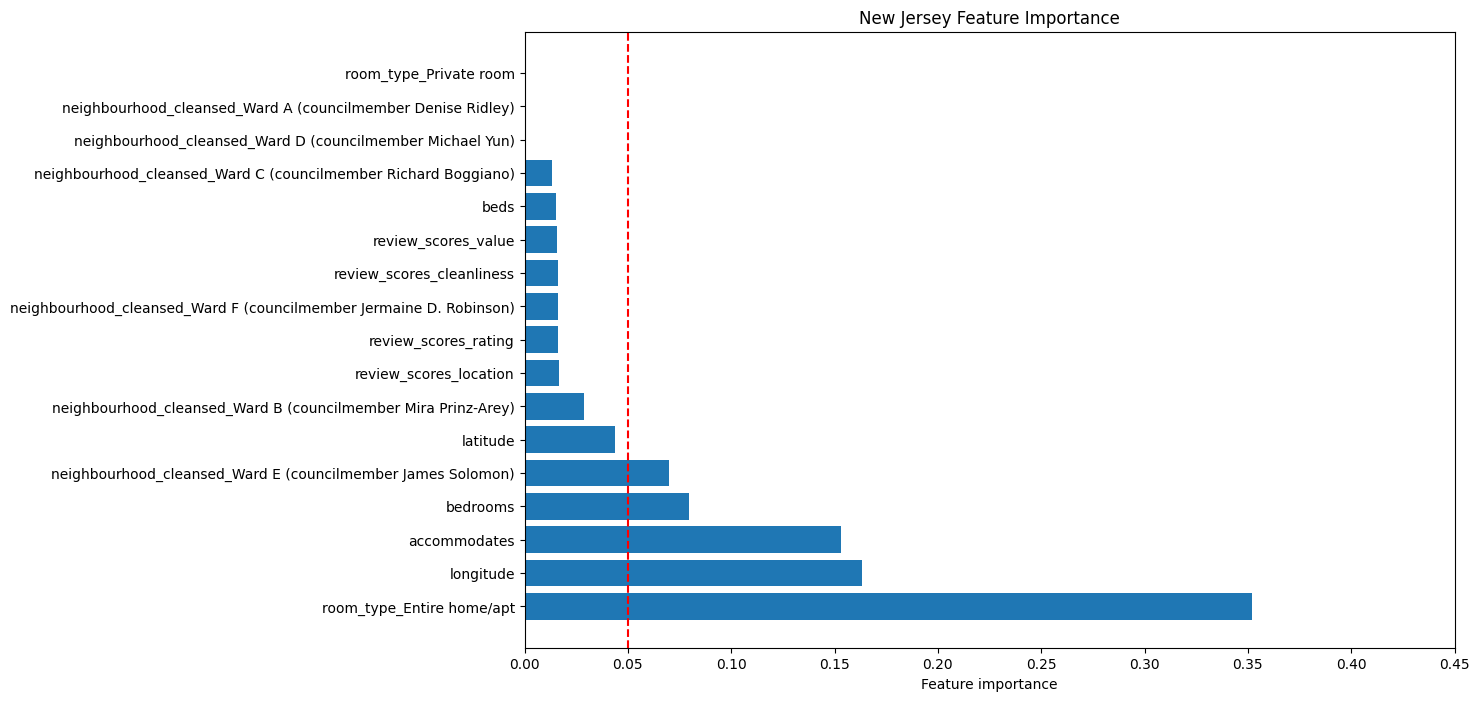

In [39]:
# plot
plt.figure(figsize=(12,8))
plt.barh(jc_feat_df.index, jc_feat_df.importance)
plt.axvline(x = 0.05, color = 'r', label = 'axvline - 0.01', ls='--')
plt.xlabel('Feature importance')
plt.title('New Jersey Feature Importance')
plt.xticks(np.arange(0, 0.5, 0.05))
plt.show()

Rio de Janeiro

In [40]:
rio_feat = rio_model.best_estimator_.named_steps["model"].feature_importances_
cat_enc = rio_model.best_estimator_.named_steps["preprocess"].transformers_[1][1].named_steps['one_hot'].get_feature_names_out()
rio_feat_names = np.concatenate((num_atributes, cat_enc))

In [41]:
rio_feat_df = pd.DataFrame(rio_feat, index = rio_feat_names, columns=["importance"]).sort_values(by = ['importance'], ascending = False)
print(rio_feat_df[rio_feat_df.importance > 0.005])

                                                 importance
bedrooms                                           0.399481
review_scores_location                             0.040037
accommodates                                       0.032395
room_type_Entire home/apt                          0.031501
neighbourhood_cleansed_Joá                         0.023850
review_scores_value                                0.019835
neighbourhood_cleansed_Leblon                      0.019591
neighbourhood_cleansed_Copacabana                  0.017853
review_scores_rating                               0.014726
neighbourhood_cleansed_Lagoa                       0.013855
neighbourhood_cleansed_Barra da Tijuca             0.013769
neighbourhood_cleansed_Vidigal                     0.013485
latitude                                           0.013203
neighbourhood_cleansed_Jacarepaguá                 0.013045
review_scores_cleanliness                          0.012986
neighbourhood_cleansed_Ipanema          

In [42]:
rio_feat.sort()
print(rio_feat)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00097593 0.00099776 0.00129176 0.00144271 0.0015388  0.00155101
 0.00164637 0.0018147  0.00212161 0.00226711 0.00246727 0.00252879
 0.00277334 0.00292503 0.00323769 0.00325124 0.00327055 0.00356031
 0.00358316 0.00359093 0.0037559

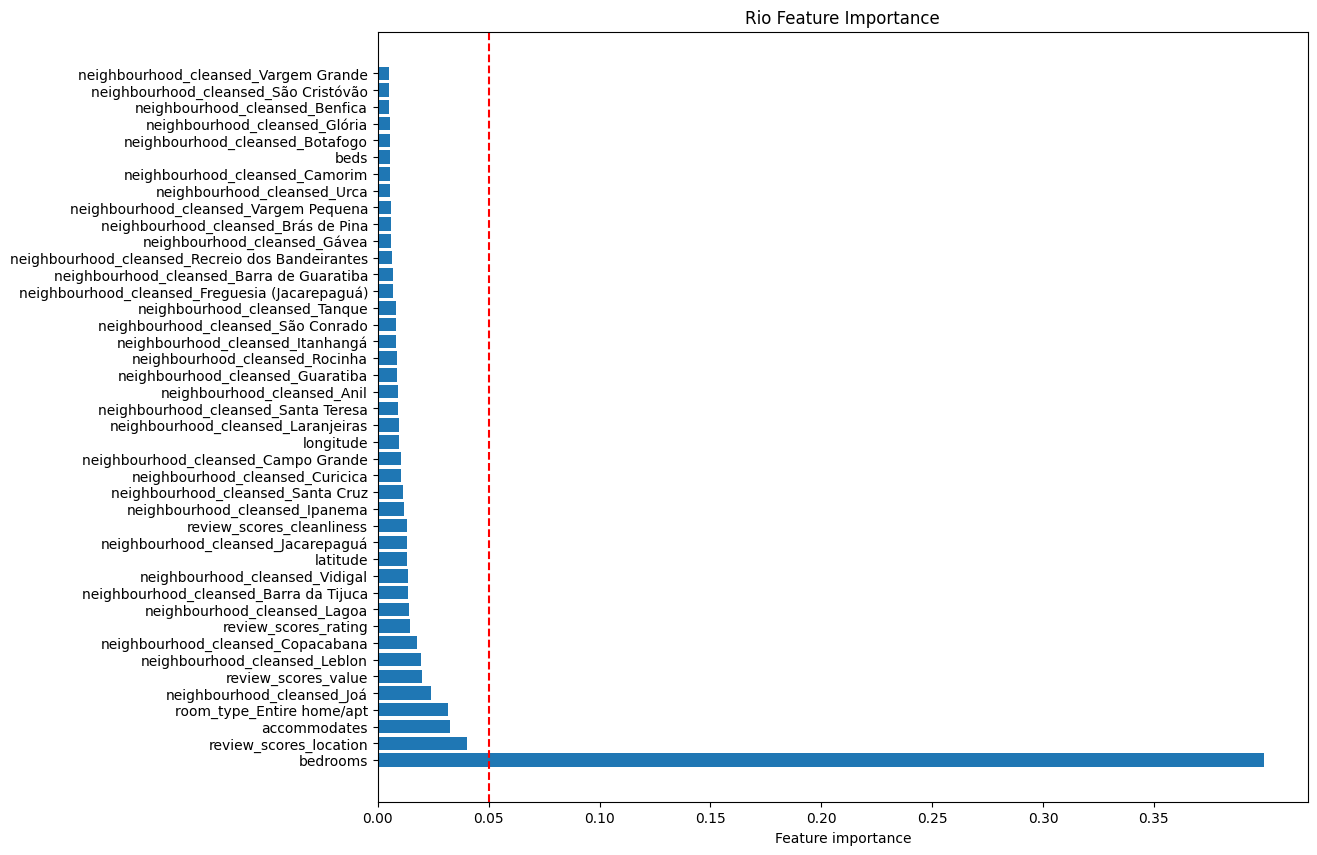

In [43]:
# plot
plt.figure(figsize=(12,10))
rio_filtered = rio_feat_df[rio_feat_df.importance > 0.005]
plt.axvline(x = 0.05, color = 'r', label = 'axvline - 0.01', ls='--')
plt.barh(rio_filtered.index, rio_filtered.importance)
plt.xlabel('Feature importance')
plt.title('Rio Feature Importance')
plt.xticks(np.arange(0, 0.40, 0.05))
plt.show()

New York City

In [44]:
nyc_feat = nyc_model.best_estimator_.named_steps["model"].feature_importances_
cat_enc = nyc_model.best_estimator_.named_steps["preprocess"].transformers_[1][1].named_steps['one_hot'].get_feature_names_out()
nyc_feat_names = np.concatenate((num_atributes, cat_enc))

In [45]:
nyc_feat_df = pd.DataFrame(nyc_feat, index = nyc_feat_names, columns=["importance"]).sort_values(by = ['importance'], ascending = False)
print(nyc_feat_df[nyc_feat_df.importance > 0.005])

                                           importance
room_type_Entire home/apt                    0.283519
accommodates                                 0.055884
bedrooms                                     0.035007
neighbourhood_cleansed_Long Island City      0.017508
longitude                                    0.016667
neighbourhood_cleansed_Financial District    0.016065
neighbourhood_cleansed_Midtown               0.013292
neighbourhood_cleansed_Lower East Side       0.011753
latitude                                     0.011736
neighbourhood_cleansed_Tribeca               0.010582
neighbourhood_cleansed_Bayside               0.010576
neighbourhood_cleansed_Hell's Kitchen        0.010517
neighbourhood_cleansed_Theater District      0.009817
neighbourhood_cleansed_SoHo                  0.009601
neighbourhood_cleansed_Little Italy          0.009593
neighbourhood_cleansed_Williamsburg          0.009376
neighbourhood_cleansed_Flatiron District     0.008139
neighbourhood_cleansed_East 

In [46]:
nyc_feat.sort()
print(nyc_feat)

[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.000

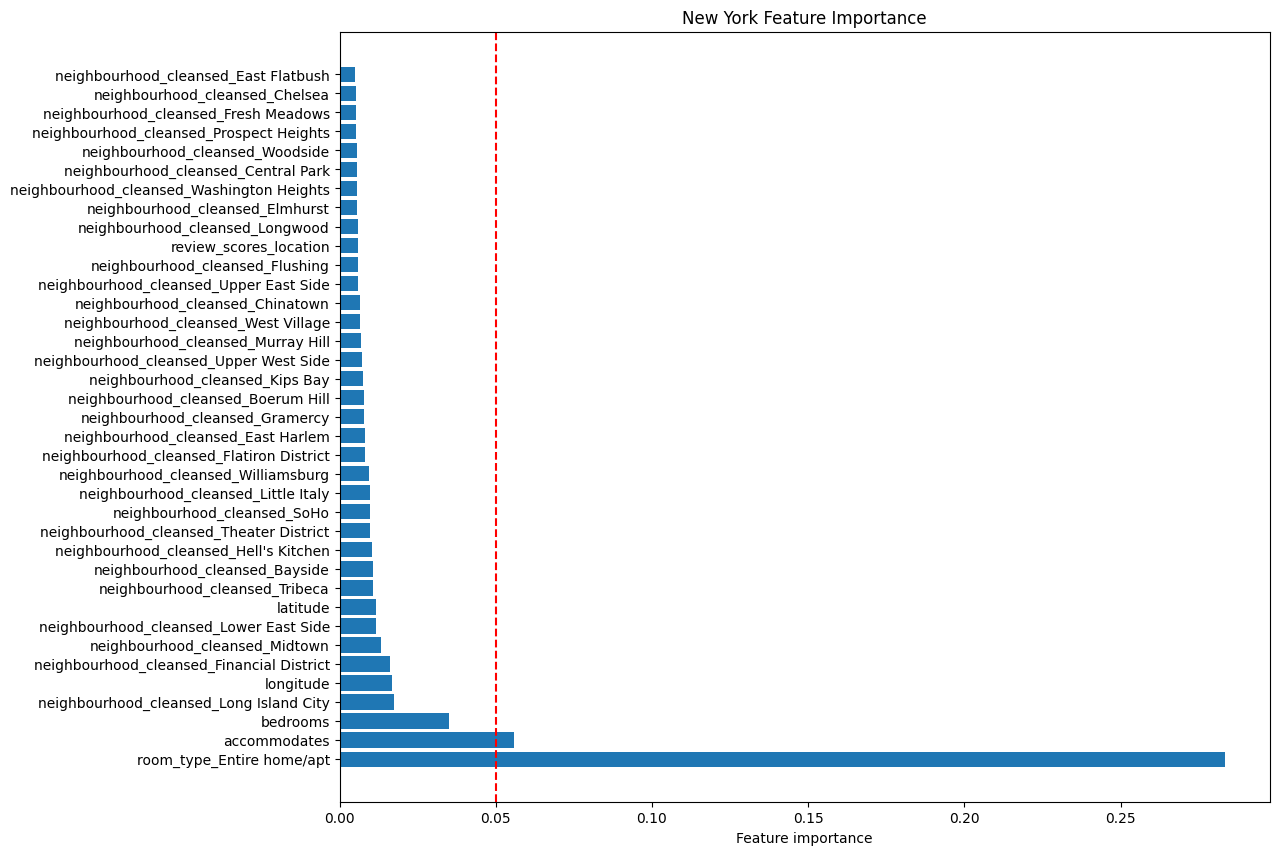

In [47]:
# plot
plt.figure(figsize=(12,10))
nyc_filtered = nyc_feat_df[nyc_feat_df.importance > 0.005]
plt.barh(nyc_filtered.index, nyc_filtered.importance)
plt.axvline(x = 0.05, color = 'r', label = 'axvline - 0.01', ls='--')
plt.xlabel('Feature importance')
plt.title('New York Feature Importance')
plt.show()

## Results discussion and Model insights

The importance of features in Jersey City and New York City is relatively similar. The most important features are room type and the number of people that a listing accommodates. Additionally, the number of bedrooms and longitude are also important features.

Among Jersey City neighborhoods, the Ward E district, which is closest to Manhattan and the easy access to the PATH transportation system, is the most important feature. In New York, the Financial District has the highest feature importance among neighborhoods.

In contrast, Rio has the number of bedrooms and the review score of listing locations as the top two features. The number of people that a listing accommodates and room type are ranked third and fourth in terms of feature importance. For Rio, review score metrics are important and make up the top 10 feature importances. These results are consistent with a city that can be dangerous; therefore, reviews about location, value, overall rating, and cleanliness can be used as a proxy to estimate the safety of the listing and region.

Overall, our tuned model worked better for Jersey City and New York. This may be because there isn't a wide spread of prices within a neighborhood for these cities. In contrast, even a sought-after neighborhood in Rio can have dangerous places, so the price range within Rio neighborhood can be wide.

Including longitude and latitude as features helped model the location of listings. However, for Rio listings, which have unique challenges such as the possibility of stray bullets, spacial regression and spacial indexing might provide a better model.

## Save model object 

In [48]:
import datetime
# JC

jc_model.version = '1.0'
jc_model.pandas_version = pd.__version__
jc_model.numpy_version = np.__version__
jc_model.xgb_version = xgb.__version__
jc_model.X_columns = [col for col in jc_X_train.columns]
jc_model.build_datetime = datetime.datetime.now()

# Rio

rio_model.version = '1.0'
rio_model.pandas_version = pd.__version__
rio_model.numpy_version = np.__version__
rio_model.xgb_version = xgb.__version__
rio_model.X_columns = [col for col in jc_X_train.columns]
rio_model.build_datetime = datetime.datetime.now()

# NYC

nyc_model.version = '1.0'
nyc_model.pandas_version = pd.__version__
nyc_model.numpy_version = np.__version__
nyc_model.xgb_version = xgb.__version__
nyc_model.X_columns = [col for col in jc_X_train.columns]
nyc_model.build_datetime = datetime.datetime.now()

In [49]:
# save the model
import joblib
modelpath = '../Data'

joblib.dump(jc_model, modelpath+'jc_model.pkl')
joblib.dump(rio_model, modelpath+'rio_model.pkl')
joblib.dump(nyc_model, modelpath+'nyc_model.pkl')

['../Datanyc_model.pkl']